# Calculando o volume de folhelho a partir de raios gama: modelos Larionov, Clavier e Stieber

A radioatividade natural das rochas origina-se, primariamente, de três fontes: do K40
e dos elementos filhos do Urânio e do Tório. Os folhelhos são as rochas mais radioativas
dentre as sedimentares. Cerca de 8% de toda a emissão radioativa dos folhelhos é
devida ao K40 (Rider, 1990).

A metodologia de cálculo da argilosidade de uma rocha (VSH = razão entre o
volume de argila e o volume total investigado da amostra) com o perfil de RG, baseia-se
no fato de que toda ela seja devida a presença exclusiva do K40, vez que os
argilominerais originam-se da hidrólise das micas e dos feldspatos potássicos. Valores
acima de 5 % de K2O foram observados nos arcósios, nos conglomerados policompostos
e nos arenitos resultantes de depósitos em ambientes redutores (Cox et al, 1967).

Portanto, nestas litologias, as altas radioatividades registradas pelos perfis de RG não
representam, necessariamente, altas argilosidades, fato este que limita, e complica, seu
uso como quantificador de VSH e identificador litológico.

Excluindo-se as litologias citadas acima, e/ou mineralizações localizadas (na
natureza, Po84, Rn86, Fr87, Ra88, Ac89, Pa91, Pu94, Am95 etc, representam muito menos que
$1%$), todo aumento da radioatividade natural registrada pelos RG, implica em um
aumento do teor de K40 e, portanto, da argilosidade. (Nery,1999)

Estimar o volume de folhelho da rocha VSH linearmente a partir do perfil de raios gama ainda continua sendo a primeira abordagem preferida a se tornar com um indicador preliminar de folhelho. O procedimento é fácil e direto, e pode dar resultados razoáveis para alguns reservatórios profundos. A primeira equação mostrada abaixo define um índice de folhelho ativo IGR como uma função do sinal de log de raios gama GR: Ele só precisa registrar a resposta do log de raios gama para um corpo de folhelho conhecido próximo e uma rocha limpa conhecida nas proximidades.

No entanto, muitas vezes o IGR produz uma superestimação do volume de folhelho da rocha (especialmente para reservatórios rasos e jovens), produzindo um cenário geral pessimista da qualidade do reservatório. Para superar isso, várias formulações empíricas foram desenvolvidas para corrigir e reduzir o volume de folhelho da rocha Vshale como funções diretas de IGR, ou seja, VSH = f (IGR), tentando ajustar a resposta radioativa total dos argilominerais.

Índice de raios gama (IGR) significa que ao medir o intervalo estratigráfico da idade Devoniana, o índice de raios gama em qualquer ponto deve ser calculado dividindo o valor do log de raios gama naquele ponto pelo valor do log de gama na linha de base do xisto estabelecida sobre o todo o intervalo de idade devoniano penetrado pelo poço. 

Neste trabalho, optou-se por normalizar os valores de IGR, muito embora sendo da mesma natureza física, apresentam melhores valores em termos absolutos para futuros cálculos. Neste caso, $GR_{folhelho}$ passa a ser o substituído pelo $GR_{MAX}$ e o $GR_{limpo}$ passa a ser substituído pelo $GR_{MIN}$. A Equação abaixo apresenta essa adaptação para a normalização conhecida como $\textbf{MINMAX}$.

$$
VSH_{linearGRindex}=IGR=\dfrac{GR_{log}-GR_{MIN}}{GR_{MAX}-GR_{MIN}}
$$

Ordenadas do indicador de xisto mais pessimista IGR (mais VSH), ao mais otimista, a equação Larionov VSH para rochas jovens e terciárias (menos VSH), as equações mostram o indicador Linear VSH IGR, o modelo Larionov para rochas mais antigas, o Modelo de Clavier, o modelo de Stieber e o modelo de Larionov para rochas terciárias:

$$
VSH_{Larionov} = 0.33 (2^{(2 \times IGR)}-1)
$$
$$
VSH_{clavier} = 1.7 - \sqrt{3.38-(IGR+0.7)^{2}}
$$
$$
VSH_{Stieber} = \dfrac{IGR}{3 -2  \times IGR}
$$

Neste estudo eu irei, por questão de otimização de tempo implementar e testar o $VSH_{clavier}$,$VSH_{larionov}$ e $VSH_{stieber}$. 

In [10]:
######################PACOTES##########################
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import lasio
import seaborn as sns
sys.path.insert(0,'../modules')
from graficador import plotagem as plm2
#######################################################

In [2]:
def igr(GR):
    #Definidos através de normalização minmax
    GRmin=min(GR)
    GRmax=max(GR)
    IGR = np.zeros(np.size(GR))
    IGR = (GR-GRmin)/(GRmax-GRmin)
    return IGR

In [3]:
def clavier(IGR):
    VSH = np.zeros(np.size(IGR))
    VSH = 1.7 - np.sqrt(3.38-(IGR+0.7)**2.0)
    return VSH

In [4]:
def larionov(IGR):
    VSH = np.zeros(np.size(IGR))
    VSH = 0.33 * (2.0 ** (2.0 * IGR ) - 1.0 )
    return VSH

In [5]:
def stieber(IGR):
    VSH = np.zeros(np.size(IGR))
    VSH = IGR / (3-2*(IGR))
    return VSH

# Dado de entrada

In [11]:
las = lasio.read("../inputs/1SES-0173--SE-.las")
las.sections.keys()
las.sections['Version']
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")
    
    
las.sections['Well']['WELL'] = 'Brasil'

for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Start Depth (STRT): 		 2891.0
Stop Depth (STOP): 		 6549.51
Step (STEP): 		 0.1524
Null Value (NULL): 		 -99999.0
Company (COMP): 		 PETROLEO BRASILEIRO S/A
Origem dos dados (ORIG): 		 SIGEO EXPORTACAO PERFIL
Well (WELL): 		 1SES 0173  SE
Field (FLD): 		 
State (STAT): 		 SERGIPE
API Code (API): 		 901210520900
API Code (UWI): 		 901210520900
Surface X (XCOORD): 		 758643.0
Surface Y (YCOORD): 		 8723117.0
Horizontal Coordinate System (HZCS): 		 UTM
Meridiano Central (MC): 		 39 W
Latitude (LAT): 		 -11.541114
Longitude (LONG): 		 -36.62862
Geodetic Datum (GDAT): 		 SIRGAS2000
Elevation Derrick Floor (EDF): 		 25.0
Water Depth to Mean Sea Level (WDMS): 		 2820.0
Curve: DEPT, 	 Units: M, 	 Description: Measured Depth
Curve: COTA, 	 Units: M, 	 Description: Vertical Depth (without EKB)
Curve: TVD, 	 Units: M, 	 Description: Vertical Depth
Curve: COORDEW, 	 Units: , 	 Description: Coordinate East/West
Curve: COORDNS, 	 Units: , 	 Description: Coordinate North/South
Curve: BRGR, 	 Units: g

In [13]:
#----------------------------------------------------------------------#
# Leitura do data frame que contém os canais da perfilagem             #
#----------------------------------------------------------------------#
df = pd.read_csv("../inputs/1SES-0173--SE-.las", sep='\s+', skiprows=38,
                 names=('Depth(m)','Cota','TVD','Lat','Long',
                        'BRGR.gAPI','BRNEUT.%','BRDENS.g/cm3','BRDTP.us/ft','BRCALI.in'))

In [14]:
#Filtra os Nan:
df=df[(df['BRGR.gAPI'] != -99999.0)]

In [15]:
#identifica possível valores ausentes depois da filtragem:
df.isnull().sum()

Depth(m)        0
Cota            0
TVD             0
Lat             0
Long            0
BRGR.gAPI       0
BRNEUT.%        0
BRDENS.g/cm3    0
BRDTP.us/ft     0
BRCALI.in       0
dtype: int64

In [16]:
#Analisa o canal GR
df.describe()

,Depth(m),Cota,TVD,Lat,Long,BRGR.gAPI,BRNEUT.%,BRDENS.g/cm3,BRDTP.us/ft,BRCALI.in
count,23866.000000,23866.000000,23866.000000,23866.000000,2.386600e+04,23866.000000,23866.000000,23866.000000,23866.000000,23866.000000
mean,4712.048155,-4686.638572,4711.638572,758648.617478,8.723143e+06,67.600666,-47200.220511,-47207.588226,-21343.250593,-46969.065615
std,1052.856133,1052.421415,1052.421415,9.147362,2.435301e+01,22.286808,49930.865537,49923.897661,41066.538674,49913.875362
min,2891.000000,-6508.668400,2890.999700,758639.080000,8.723117e+06,8.505300,-99999.000000,-99999.000000,-99999.000000,-99999.000000
25%,3800.256500,-5600.315925,3800.234800,758640.890000,8.723120e+06,53.322700,-99999.000000,-99999.000000,63.956325,-99999.000000
50%,4709.513000,-4684.385750,4709.385750,758642.850000,8.723133e+06,65.319600,4.747750,2.428500,80.904600,8.368950
75%,5626.084700,-3775.234800,5625.315925,758658.890000,8.723162e+06,83.074225,16.344850,2.600200,109.490100,8.740375
max,6535.341200,-2865.999700,6533.668400,758662.830000,8.723200e+06,461.944600,60.686200,2.857500,157.707700,18.094800


In [17]:
#Vetoriza as variáveis
prof=np.array(df['Depth(m)'])
tvd=np.array(df['TVD'])
GR=np.array(df['BRGR.gAPI'])

## Teste das funções

In [18]:
print(igr(GR),np.size(igr(GR)),np.size(GR))
print(type(igr(GR)))

[0.00893659 0.00809458 0.00768923 ... 0.16375709 0.16113645 0.15294859] 23866 23866
<class 'numpy.ndarray'>


In [19]:
#Calculando o índice de GR
IGR = igr(GR)
#Teste do Vshale:
print(larionov(IGR),np.size(larionov(IGR)),np.size(IGR))
print(clavier(IGR),np.size(clavier(IGR)),np.size(IGR))
print(stieber(IGR),np.size(stieber(IGR)),np.size(IGR))

[0.00411371 0.00372394 0.00353646 ... 0.08410029 0.0825986  0.07794176] 23866 23866
[0.0037073  0.00335564 0.00318653 ... 0.07706325 0.07567121 0.07135679] 23866 23866
[0.00299672 0.00271283 0.00257628 ... 0.06127519 0.06017658 0.05677162] 23866 23866


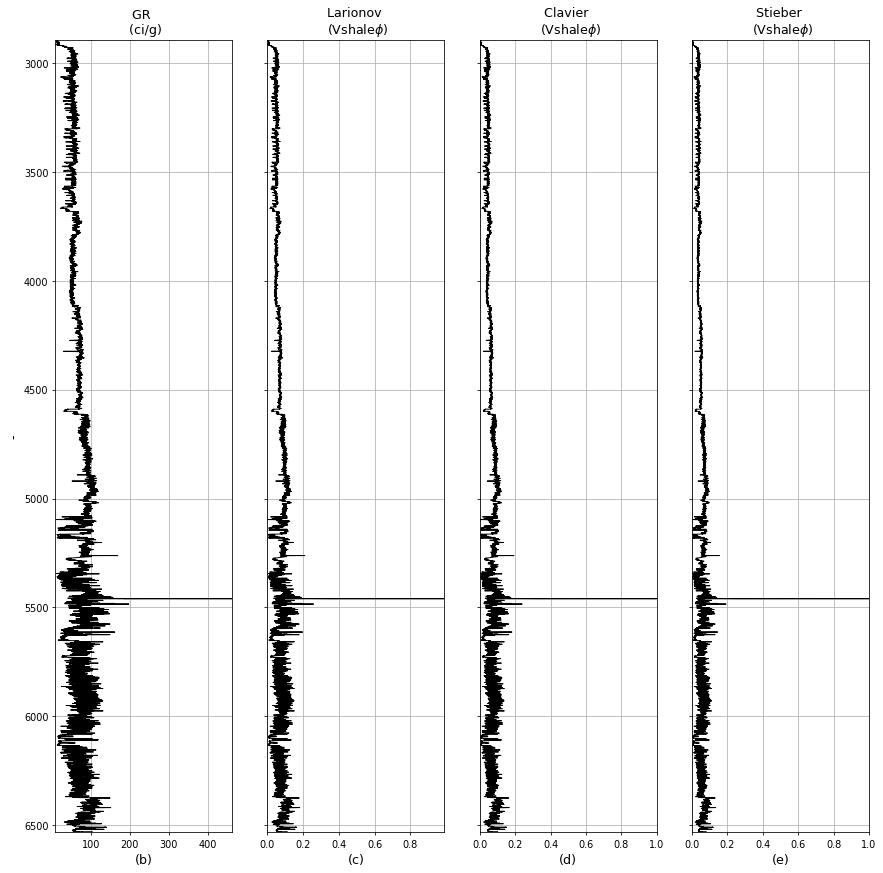

In [20]:
padrao={'comprimento':15,
            'altura':15
}
#Desenha os plots
figure2 = plm2(4, padrao)
figure2.plot_s(0,GR,tvd,{'titulo':'GR \n (ci/g)','cor':'k','descricao_x':'(b)'})
figure2.plot_s(1,larionov(IGR),tvd,{'titulo':'Larionov \n (Vshale$\phi$)','cor':'k','descricao_x':'(c)'})
figure2.plot_s(2,clavier(IGR),tvd,{'titulo':'Clavier \n (Vshale$\phi$)','cor':'k','descricao_x':'(d)'})
figure2.plot_s(3,stieber(IGR),tvd,{'titulo':'Stieber \n (Vshale$\phi$)','cor':'k','descricao_x':'(e)'})
#figure2.legenda({'ancoragem':(-0.3, 0.09, 3.0, -0.16),'colunas':2,'ordem':[0,1,2,3,4,5,6,7] })

plt.savefig('../images/VSHALE173_minmax.pdf', dpi=30, bbox_inches = 'tight', transparent = True)

In [21]:
#Salva em txt
vshale = pd.DataFrame({'TVD':prof,'Larionov':larionov(IGR),'Clavier':clavier(IGR),'Stieber':stieber(IGR)})
vshale.to_csv('../outputs/vshale173_minmax.txt', sep=' ', index=False) 

# FIM